<a href="https://colab.research.google.com/github/tathagata48/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import of libraries

In [43]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [44]:
df=pd.read_csv('fish_train.csv')
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550


In [45]:
X=df.drop('Weight',axis=1)
y=df['Weight']

In total, the dataset contains 159 objects. We have reserved a part of the dataset for the baseline task. In this assignment, it is assumed to work with a dataset containing 119 objects.

# 0. Application of polynomial regression to predict a continuous parameter

The provided dataset consists of seven different types of fish sold in some fish shop. The goal is to predict the mass of the fish from some indirect features known about the fish. The features themselves may need to be synthesized from those that are known.

Use <code>train_test_split()</code> to split the dataset into training and test samples with the parameters specified in your assignment. Use stratification by column <code>Species</code>. Stratification will maintain the proportions of represented objects (by fish type representatives) in the training and test samples.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=79, stratify=X['Species'])

Find sample mean for the column <code>Width</code> of the obtained training sample.

In [47]:
# < ENTER YOUR CODE HERE >
mean_width=X_train['Width'].mean()
mean_width

np.float64(4.578105263157895)

# 1. Building a base model

Remove categorical features and train a linear regression model (<code>LinearRegression()</code>) on the training dataset. Perform predictions on the test dataset.
Evaluate the model using the metric <code>r2_score()</code>.

In [48]:
categorical_cols = X_train.select_dtypes(include=["object"]).columns
X_train_num = X_train.drop(columns=categorical_cols)
X_test_num = X_test.drop(columns=categorical_cols)

model=LinearRegression()
model.fit(X_train_num,y_train)
y_pred_train = model.predict(X_train_num)
y_pred_test = model.predict(X_test_num)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R2 score on training set: {r2_train:.4f}")
print(f"R2 score on test set: {r2_test:.4f}")
print(X_train_num.head())

R2 score on training set: 0.8844
R2 score on test set: 0.8139
    Length1  Length2  Length3   Height   Width
56     31.4     34.0     39.2  15.9936  5.3704
97     23.6     25.2     27.9   7.0866  3.9060
4      19.0     21.0     22.5   5.6925  3.5550
19     30.4     33.0     38.3  14.8604  5.2854
81     28.5     31.0     34.0  10.7440  6.5620


# 2. Adding feature preprocessing

## Use of PCA

Using, for example, <code>sns.heatmap()</code>, construct a feature correlation matrix of the training dataset and identify the top three most correlated features.

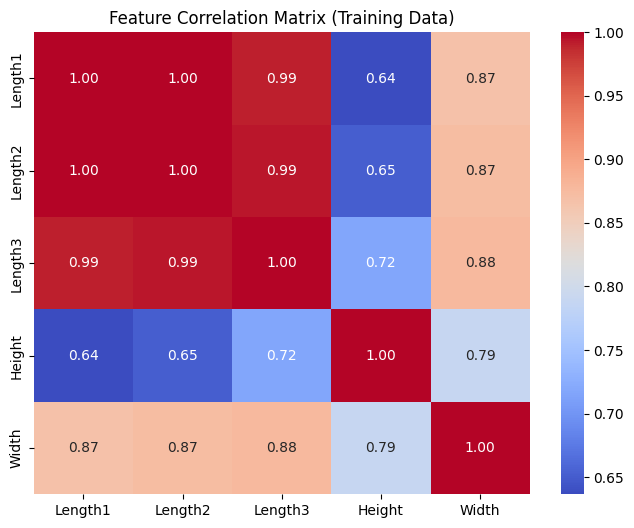

In [49]:
# < ENTER YOUR CODE HERE >
import matplotlib.pyplot as plt

correlation_matrix = X_train_num.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix (Training Data)')
plt.show()

# To identify the top three most correlated features, we can inspect the correlation matrix.
# We are looking for pairs of features with the highest absolute correlation values (excluding self-correlations).
# A quick glance often reveals 'Length1', 'Length2', and 'Length3' as highly correlated.

Linear models respond rather poorly to correlated features, so it makes sense to get rid of such features before training begins.

Use the principal component analysis to reduce the number of uninformative dimensions.

1) Apply the principal component analysis (<code>PCA(n_components=3, svd_solver='full')</code>) to the three most correlated features found.

2) Calculate the explained variance ratio when using only the first principal component.

3) Replace the top three most correlated features with the new feature <code>Lengths</code> whose values coincide with the scores for the first principal component.

In [50]:
# < ENTER YOUR CODE HERE >
from sklearn.decomposition import PCA
pca = PCA(n_components=3, svd_solver='full')
X_train_transformed = pca.fit_transform(X_train_num[['Length1', 'Length2', 'Length3']])
print(pca.explained_variance_ratio_[0])
X_train_num['Lengths']=X_train_transformed[:,0]
X_train_num=X_train_num.drop(columns=['Length1', 'Length2', 'Length3'])
X_train_num


0.9964170698787621


,Height,Width,Lengths
56,15.9936,5.3704,9.592341
97,7.0866,3.9060,-6.633948
4,5.6925,3.5550,-14.852537
19,14.8604,5.2854,7.925099
81,10.7440,6.5620,3.098096
...,...,...,...
24,14.3714,4.8146,4.565812
10,5.9175,3.3075,-14.852537
25,8.8928,3.2928,-15.810724
95,6.5772,2.3142,-23.686524


Apply the obtained transformation for the same features in the test dataset. Note that it is not necessary to re-train the `PCA` transformation. Similarly to the previous step, replace the three considered features by one.

In [51]:
# < ENTER YOUR CODE HERE >
X_test_transformed = pca.transform(X_test_num[['Length1', 'Length2', 'Length3']])
X_test_num = X_test_num.drop(columns=['Length1', 'Length2', 'Length3'])
X_test_num['Lengths'] = X_test_transformed[:, 0]
X_test_num.head()

,Height,Width,Lengths
5,6.5610,4.2390,-7.014164
1,7.2828,4.5662,-3.728901
92,16.2405,5.5890,11.239078
66,7.5344,3.8352,-8.613935
57,6.7920,3.6240,-12.258909


Train a basic linear regression model on the obtained training dataset, again discarding categorical features. Perform predictions on the test dataset and evaluate the model using <code>r2_score()</code>.

In [52]:
# < ENTER YOUR CODE HERE >
model = LinearRegression()
model.fit(X_train_num, y_train)
y_pred_train = model.predict(X_train_num)
y_pred_test = model.predict(X_test_num)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R2 score on training set: {r2_train:.4f}")
print(f"R2 score on test set: {r2_test:.4f}")

R2 score on training set: 0.8802
R2 score on test set: 0.7901


It can be seen that the quality of the model has not changed significantly.

## Feature engineering

Plot the dependencies of the features on the target feature, e.g., by using <code>sns.pairplot()</code>.

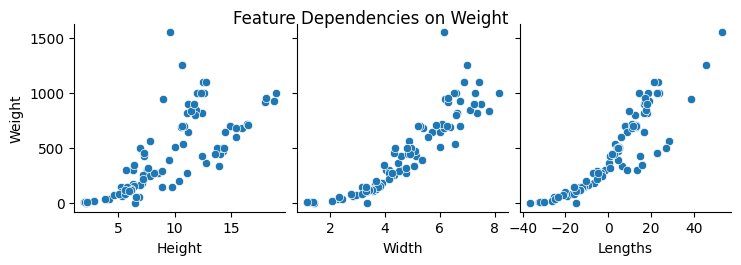

In [53]:
# < ENTER YOUR CODE HERE >
train_data_for_plot = X_train_num.copy()
train_data_for_plot['Weight'] = y_train

sns.pairplot(train_data_for_plot, y_vars=['Weight'], x_vars=['Height', 'Width', 'Lengths'])
plt.suptitle('Feature Dependencies on Weight', y=1.02) # Add a title above the plots
plt.show()

It can be seen that the mass, in general, does not depend linearly on the other features. So, in order for the linear model to do a proper predictions, it makes sense to transform the features so that the dependence becomes more similar to a linear one. But how to come up with such a dependence?

It is logical to assume that the mass of a fish should somehow smoothly depend on the other parameters responsible in one way or another for its size. If we remember that mass is the product of density by volume, then

$$
m = \rho \cdot V.
$$

Suppose that the average density of all fish is the same, and recall that in homothety the volume of the object depends on the linear dimensions as a cube, then we obtain

$$
m\sim V\sim d^3
$$

Take to the third degree all the features of training and test datasets that are responsible in one way or another for the fish size (<code>Height, Width, Lengths</code>), and check whether the dependence of mass on these features has become linear.

In [54]:
# Apply cubic transformation to X_train_num
X_train_num_cubed = X_train_num.copy()
X_train_num_cubed['Height'] = X_train_num_cubed['Height']**3
X_train_num_cubed['Width'] = X_train_num_cubed['Width']**3
X_train_num_cubed['Lengths'] = X_train_num_cubed['Lengths']**3
X_train_num = X_train_num_cubed

# Apply cubic transformation to X_test_num
X_test_num_cubed = X_test_num.copy()
X_test_num_cubed['Height'] = X_test_num_cubed['Height']**3
X_test_num_cubed['Width'] = X_test_num_cubed['Width']**3
X_test_num_cubed['Lengths'] = X_test_num_cubed['Lengths']**3
X_test_num = X_test_num_cubed

print("X_train_num after cubing:")
print(X_train_num.head())
print("\nX_test_num after cubing:")
print(X_test_num.head())

X_train_num after cubing:
         Height       Width      Lengths
56  4091.086766  154.888760   882.620126
97   355.888340   59.593201  -291.955190
4    184.462936   44.928179 -3276.437646
19  3281.644247  147.650044   497.753313
81  1240.217911  282.558696    29.736134

X_test_num after cubing:
         Height       Width      Lengths
5    282.429536   76.171104  -345.086267
1    386.273710   95.206103   -51.849273
92  4283.494243  174.583151  1419.685367
66   427.706666   56.411033  -639.152887
57   313.323545   47.595355 -1842.279097


Enter the sample mean for the column <code>Width</code> of the training dataset after cubeization.

In [55]:
# < ENTER YOUR CODE HERE >
mean_width_cubed=X_train_num['Width'].mean()
mean_width_cubed

np.float64(137.26184399708632)

Choose the images corresponding to the dependence of <code>Weight</code> on <code>Width</code> before the transformation and after.

Train a basic linear regression model on the obtained training dataset, again discarding categorical features. Perform predictions for the test dataset, evaluate the model using `r2_score()`.

In [56]:
model = LinearRegression()
model.fit(X_train_num, y_train)
y_pred_train = model.predict(X_train_num_cubed)
y_pred_test = model.predict(X_test_num_cubed)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R2 score on training set: {r2_train:.4f}")
print(f"R2 score on test set: {r2_test:.4f}")

R2 score on training set: 0.9460
R2 score on test set: 0.9098


Note how such uncomplicated feature work helped dramatically improve the quality of the model!

## Adding categorical features

Add the previously excluded categorical features to the dataset obtained in the previous step, having previously performed one-hot encoding using pd.get_dummies(). Train the linear regression model. Enter r2_score() of the obtained model.

Perform the <code>one-hot</code> encoding of the categorial feature `Species`, e.g., using <code>pd.get_dummies()</code>.

Train a linear regression model on the obtained training dataset. Perform predictions for the test dataset, evaluate the model using the <code>r2_score()</code>.

<b>Note</b>: We purposely used stratified splitting so that all values of a categorical feature <code>Species</code> are present in all datasets. But this is not always possible. You can read about how to deal with this problem, for example, [here](https://predictivehacks.com/?all-tips=how-to-deal-with-get_dummies-in-train-and-test-dataset).

In [62]:
# < ENTER YOUR CODE HERE >
X_train_species_encoded = pd.get_dummies(X_train['Species'], prefix='Species')
X_test_species_encoded = pd.get_dummies(X_test['Species'], prefix='Species')
X_train_full_cubed = pd.concat([X_train_num, X_train_species_encoded], axis=1)
X_test_full_cubed = pd.concat([X_test_num, X_test_species_encoded], axis=1)
model = LinearRegression()
model.fit(X_train_full_cubed, y_train)
y_pred_train = model.predict(X_train_full_cubed)
y_pred_test = model.predict(X_test_full_cubed)
print(f"R2 score on training set: {r2_train:.4f}")
print(f"R2 score on test set: {r2_test:.4f}")



R2 score on training set: 0.9579
R2 score on test set: 0.9481


Once again, the quality has increased.

It can be seen that after `one-hot` encoding the features became correlated. You can get rid of this, for example, by using the `drop_first=True` parameter. Re-train the model after correcting this flaw. Perform predictions for the test dataset, evaluate the model using <code>r2_score()</code>.

In [64]:
# < ENTER YOUR CODE HERE >
X_train_species_encoded = pd.get_dummies(X_train['Species'], prefix='Species',drop_first=True)
X_test_species_encoded = pd.get_dummies(X_test['Species'], prefix='Species',drop_first=True)
X_train_full = pd.concat([X_train_num, X_train_species_encoded], axis=1)
X_test_full = pd.concat([X_test_num, X_test_species_encoded], axis=1)
model = LinearRegression()
model.fit(X_train_full, y_train)
y_pred_train = model.predict(X_train_full)
y_pred_test = model.predict(X_test_full)
print(f"R2 score on training set: {r2_train:.4f}")
print(f"R2 score on test set: {r2_test:.4f}")


R2 score on training set: 0.9579
R2 score on test set: 0.9481
